Code for HW2

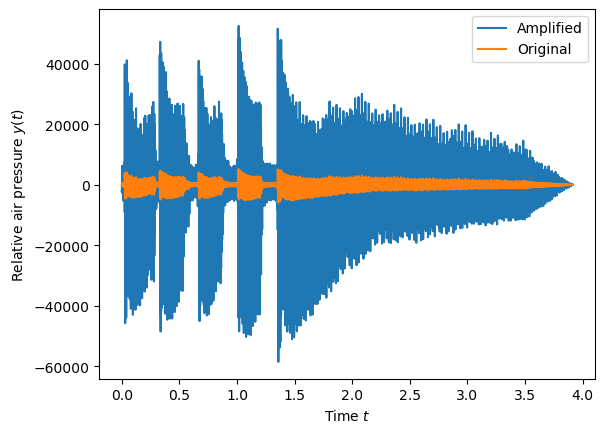

In [28]:
# Make sure to run: pip install matplotlib numpy scipy (if you don't have them already)

import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as sio

# Amplifier gain.
alpha = 10.0

# A function to amplify signal x (signal processing system).
def amplify(x, alpha):
	return alpha * x

# Read wav file (read only one stereo channel).
#
# Guitar_clean.wav copyright
# Original author: LG downloaded from freesound.org,
# Original file name: Guitar clean rif.wav
wav = sio.read("guitar_clean.wav")
sample_rate = wav[0]
# Read only one stereo channel.
x = wav[1][:, 0]
# Create time vector (independent variable).
time_vec = np.arange(len(x)) / float(sample_rate)
# Plot original and amplified.
plt.plot(time_vec, amplify(x, alpha), label="Amplified")
plt.plot(time_vec, x, label="Original")
plt.legend()
plt.xlabel("Time $t$")
plt.ylabel("Relative air pressure $y(t)$")
plt.show()
out = amplify(x, alpha)
# Scale maximum absolute amplitude to 0.9,
# because 1.0 is the maximum allowed by the .wav file format.
# Note that this will not allow you to hear the audio signal amplitude increasing.
out = 0.9 * out / np.max(np.abs(out))
# Write compressed output to wav file.
# Patch from Jostein and Adrian (cast to 32 bit float).
sio.write("guitar_amp.wav", sample_rate, np.array(out, dtype=np.float32))

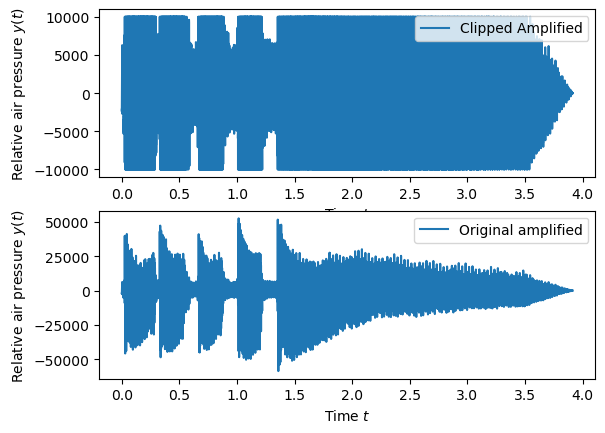

In [35]:
# The nonlinear clipping 
beta = 10000
def hard_clip(x, beta):
    return np.clip(x, -beta, beta)
out_clipped = hard_clip(amplify(x, alpha), beta)
# Scale maximum absolute amplitude to 0.9 for proper audio playback
fig, (ax0, ax1) = plt.subplots(2, 1)
ax0.plot(time_vec, out_clipped, label="Clipped Amplified")
ax1.plot(time_vec, amplify(x,alpha), label="Original amplified")
ax0.legend()
ax1.legend()
ax0.set_xlabel("Time $t$")
ax1.set_xlabel("Time $t$")
ax0.set_ylabel("Relative air pressure $y(t)$")
ax1.set_ylabel("Relative air pressure $y(t)$")
plt.show()
# Write scaled output to wav file.
out_clipped = 0.9 * out_clipped / np.max(np.abs(out_clipped))
sio.write("guitar_nonlinear.wav", sample_rate, np.array(out_clipped, dtype=np.float32))